In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inLine

In [3]:
df=pd.read_excel(r'C:\Users\cw\Desktop\F1_Project\Data_An.xlsx')

In [4]:
df.head()

,Order ID,Order Date,Year,Month,Qtr,Order Priority,Order Quantity,Sales,Discount,Ship Mode,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,3,2010-10-13,2010,Oct,Q3,Low,6,261.5400,0.04,Regular Air,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,40471
1,293,2012-10-01,2012,Oct,Q3,High,49,10123.0200,0.07,Delivery Truck,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,41184
2,483,2011-07-10,2011,Jul,Q2,High,30,4965.7595,0.08,Regular Air,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,40736
3,515,2010-08-28,2010,Aug,Q2,Not Specified,19,394.2700,0.08,Regular Air,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,40420
4,613,2011-06-17,2011,Jun,Q1,High,12,93.5400,0.03,Regular Air,...,Carl Jackson,Nunavut,Nunavut,Corporate,Office Supplies,Binders and Binder Accessories,"Angle-D Binders with Locking Rings, Label Holders",Small Box,0.38,40711


In [5]:
df.shape

(5495, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495 entries, 0 to 5494
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              5495 non-null   int64         
 1   Order Date            5495 non-null   datetime64[ns]
 2   Year                  5495 non-null   int64         
 3   Month                 5495 non-null   object        
 4   Qtr                   5495 non-null   object        
 5   Order Priority        5495 non-null   object        
 6   Order Quantity        5495 non-null   int64         
 7   Sales                 5495 non-null   float64       
 8   Discount              5495 non-null   float64       
 9   Ship Mode             5495 non-null   object        
 10  profit                5495 non-null   float64       
 11  Unit Price            5495 non-null   float64       
 12  Shipping Cost         5495 non-null   float64       
 13  Customer Name     

# Data Manipulation

In [8]:
# Null Values
df.isnull().sum()

Order ID                 0
Order Date               0
Year                     0
Month                    0
Qtr                      0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
Province                 0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Name             0
Product Container        0
Product Base Margin     46
Ship Date                0
dtype: int64

- We Can see that there are **46** Null Values in **Product Base Margin** 

In [9]:
# Dropping Null Values
df.dropna(inplace=True)

In [12]:
# After dropping Null Values
df.shape

(5449, 23)

In [11]:
df.columns

Index(['Order ID', 'Order Date', 'Year', 'Month', 'Qtr', 'Order Priority',
       'Order Quantity', 'Sales', 'Discount', 'Ship Mode', 'profit',
       'Unit Price', 'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

## Number Of Customers

In [15]:
customer_counts = df['Customer Name'].value_counts()
print("Number of customers:", len(customer_counts))

Number of customers: 795


## How many Orders ?

In [16]:
num_orders = len(df['Order ID'])
print("Total number of orders:", num_orders)

Total number of orders: 5449


## Total Sales

In [17]:
total_sales = df['Sales'].sum()
print("Total sales:", total_sales)

Total sales: 9534658.1575


## Profit %

In [23]:
total_profit = df['profit'].sum()
total_sales = df['Sales'].sum()

profit_percentage = (total_profit / total_sales) * 100
print("Profit percentage:", profit_percentage)

Profit percentage: 11.31047029867258


## Total Sales In each Region

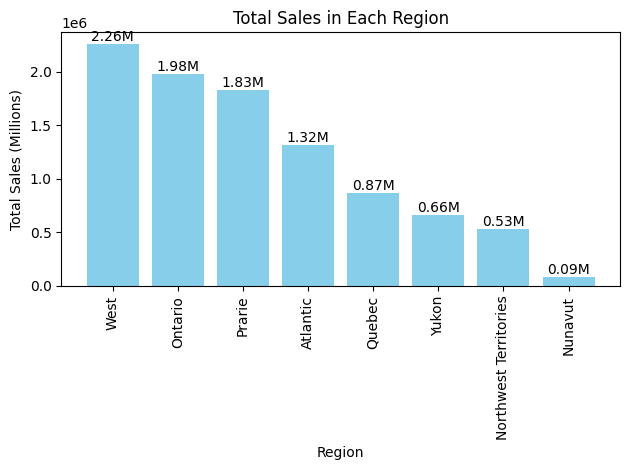

In [36]:
sales_by_region = sales_by_region.sort_values(by='Sales', ascending=False)

# Create a bar chart
plt.bar(sales_by_region['Region'], sales_by_region['Sales'], color='skyblue')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales (Millions)')
plt.title('Total Sales in Each Region')

# Add total sales values (in millions) above the bars
for i, sales in enumerate(sales_by_region['Sales']):
    sales_millions = sales / 1000000  # Convert sales to millions
    plt.text(i, sales, f'{sales_millions:.2f}M', ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

## Total Sales in eash Province

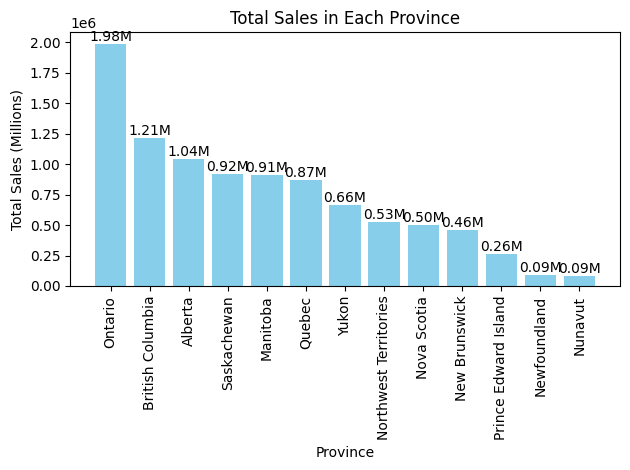

In [38]:
sales_by_province = df.groupby('Province')['Sales'].sum().reset_index()

# Sort the DataFrame by total sales in descending order
sales_by_province = sales_by_province.sort_values(by='Sales', ascending=False)

# Create a bar chart
plt.bar(sales_by_province['Province'], sales_by_province['Sales'], color='skyblue')

# Add labels and title
plt.xlabel('Province')
plt.ylabel('Total Sales (Millions)')
plt.title('Total Sales in Each Province')

# Add total sales values (in millions) above the bars
for i, sales in enumerate(sales_by_province['Sales']):
    sales_millions = sales / 1000000  # Convert sales to millions
    plt.text(i, sales, f'{sales_millions:.2f}M', ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=90)  
plt.tight_layout() 
plt.show()

## Product Category

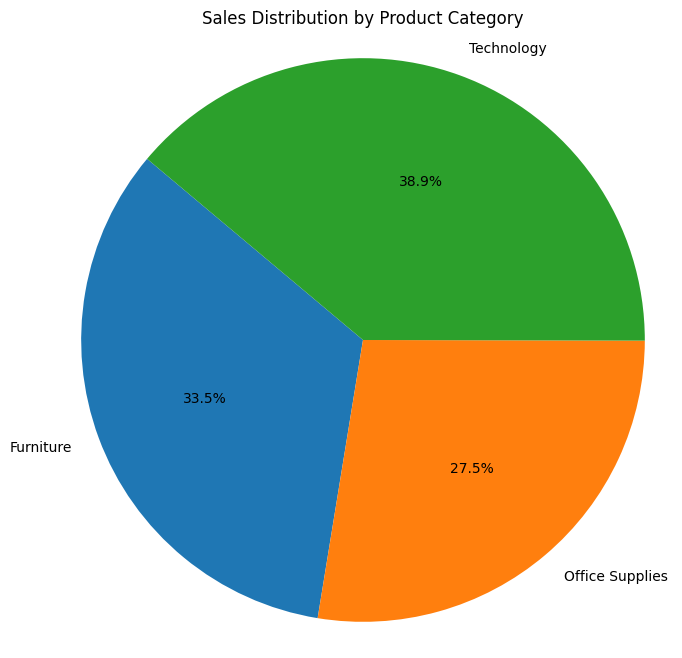

In [39]:
sales_by_category = df.groupby('Product Category')['Sales'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Product Sub-Category

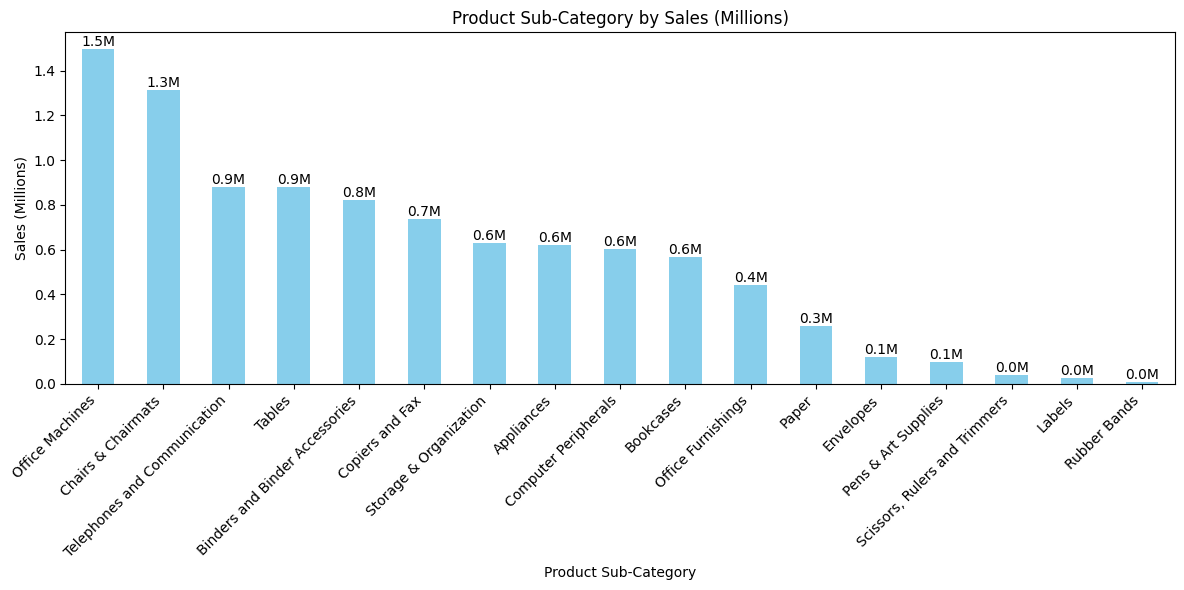

In [40]:
sales_by_subcategory = df.groupby('Product Sub-Category')['Sales'].sum()

# Sorting the values for better visualization
sales_by_subcategory = sales_by_subcategory.sort_values(ascending=False)

# Convert sales to millions
sales_by_subcategory_millions = sales_by_subcategory / 1000000  # Convert to millions

# Creating the bar chart
plt.figure(figsize=(12, 6))
sales_by_subcategory_millions.plot(kind='bar', color='skyblue')
plt.title('Product Sub-Category by Sales (Millions)')
plt.xlabel('Product Sub-Category')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45, ha='right')

# Displaying the values on top of each bar
for i, sales in enumerate(sales_by_subcategory_millions):
    plt.text(i, sales, f'{sales:.1f}M', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Ship Mode

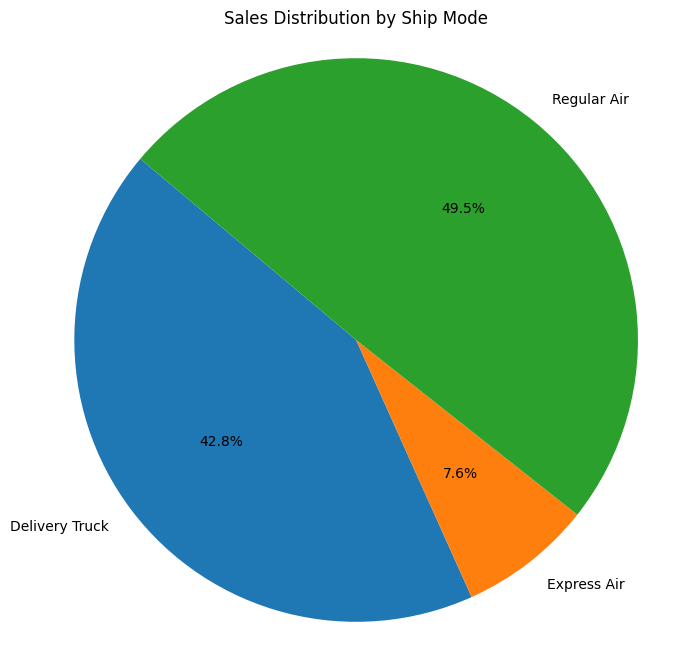

In [41]:
sales_by_ship_mode = df.groupby('Ship Mode')['Sales'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_ship_mode, labels=sales_by_ship_mode.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Ship Mode')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Sales By Customer Segment

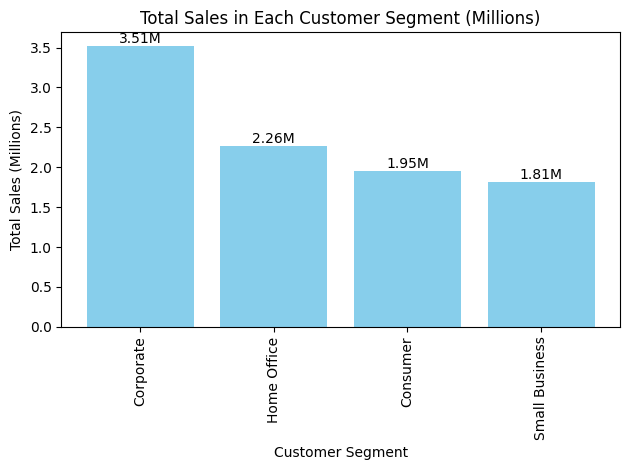

In [44]:
sales_by_segment = df.groupby('Customer Segment')['Sales'].sum().reset_index()

# Sort the DataFrame by total sales in descending order
sales_by_segment = sales_by_segment.sort_values(by='Sales', ascending=False)

# Convert sales values to millions
sales_by_segment['Sales'] /= 1000000

# Create a bar chart
plt.bar(sales_by_segment['Customer Segment'], sales_by_segment['Sales'], color='skyblue')

# Add labels and title
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales (Millions)')
plt.title('Total Sales in Each Customer Segment (Millions)')

# Add total sales values (in millions) above the bars
for i, sales in enumerate(sales_by_segment['Sales']):
    plt.text(i, sales, f'{sales:.2f}M', ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Sales By Qtr

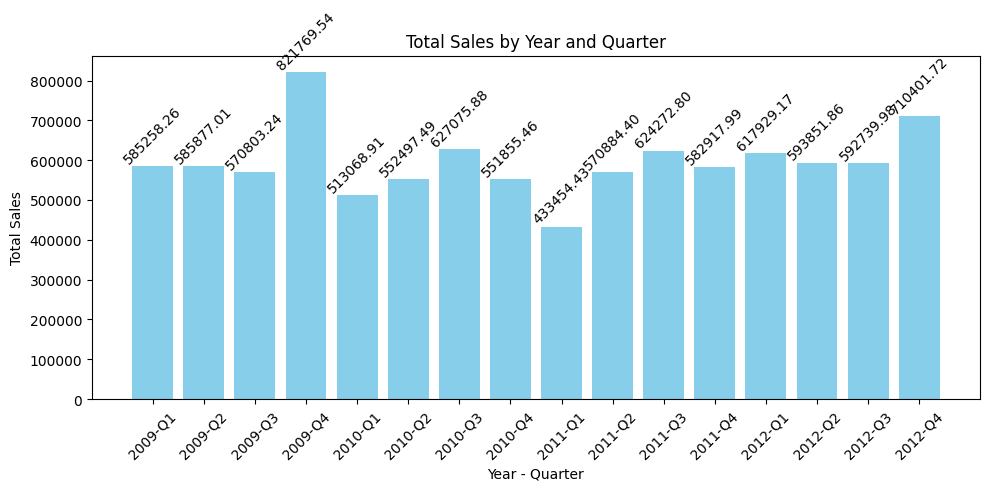

In [55]:
sales_by_year_quarter = df.groupby(['Year', 'Qtr'])['Sales'].sum().reset_index()

# Create a new column to combine year and quarter for labeling purposes
sales_by_year_quarter['Year_Qtr'] = sales_by_year_quarter['Year'].astype(str) + '-' + sales_by_year_quarter['Qtr'].astype(str)

# Create a bar chart with smaller size
plt.figure(figsize=(10, 5))  # Adjust width and height as needed

plt.bar(sales_by_year_quarter['Year_Qtr'], sales_by_year_quarter['Sales'], color='skyblue')

# Add labels and title
plt.xlabel('Year - Quarter')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year and Quarter')

# Add total sales values above the bars
for i, sales in enumerate(sales_by_year_quarter['Sales']):
    plt.text(i, sales, f'{sales:.2f}', ha='center', va='bottom', rotation=45)

# Show the plot
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

## Sales By Year

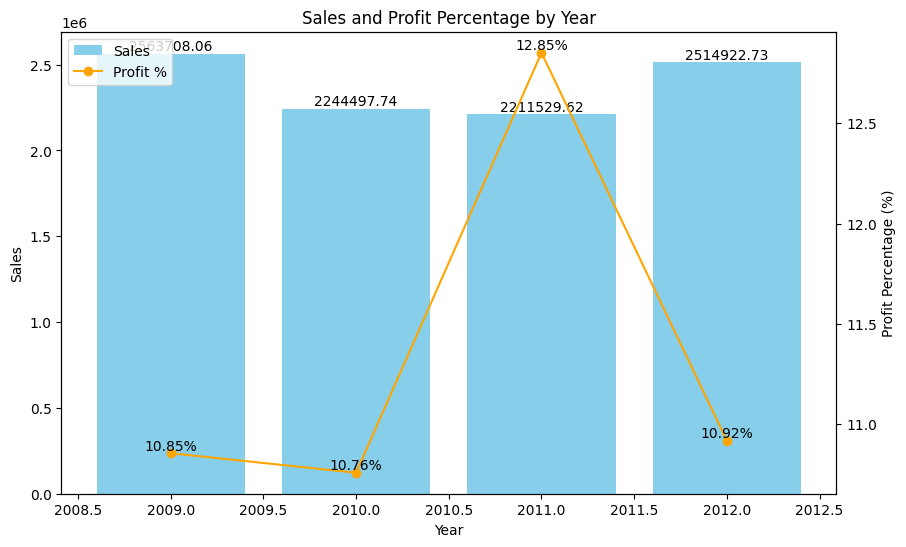

In [69]:
sales_profit_by_year = df.groupby('Year').agg({'Sales': 'sum', 'profit': 'sum'})

# Calculate profit percentage
sales_profit_by_year['Profit_Percentage'] = (sales_profit_by_year['profit'] / sales_profit_by_year['Sales']) * 100

# Creating the chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Sales
ax1.bar(sales_profit_by_year.index, sales_profit_by_year['Sales'], color='skyblue', label='Sales')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales')

# Adding profit percentage as a second y-axis
ax2 = ax1.twinx()
ax2.plot(sales_profit_by_year.index, sales_profit_by_year['Profit_Percentage'], color='orange', marker='o', label='Profit %')
ax2.set_ylabel('Profit Percentage (%)')

# Adding legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adding value annotations for sales
for i, sales in enumerate(sales_profit_by_year['Sales']):
    ax1.text(sales_profit_by_year.index[i], sales, f'{sales:.2f}', ha='center', va='bottom')

# Adding value annotations for profit percentage
for i, profit_percentage in enumerate(sales_profit_by_year['Profit_Percentage']):
    ax2.text(sales_profit_by_year.index[i], profit_percentage, f'{profit_percentage:.2f}%', ha='center', va='bottom')

# Adding title
plt.title('Sales and Profit Percentage by Year')

plt.show()

## Total Sales Over Time

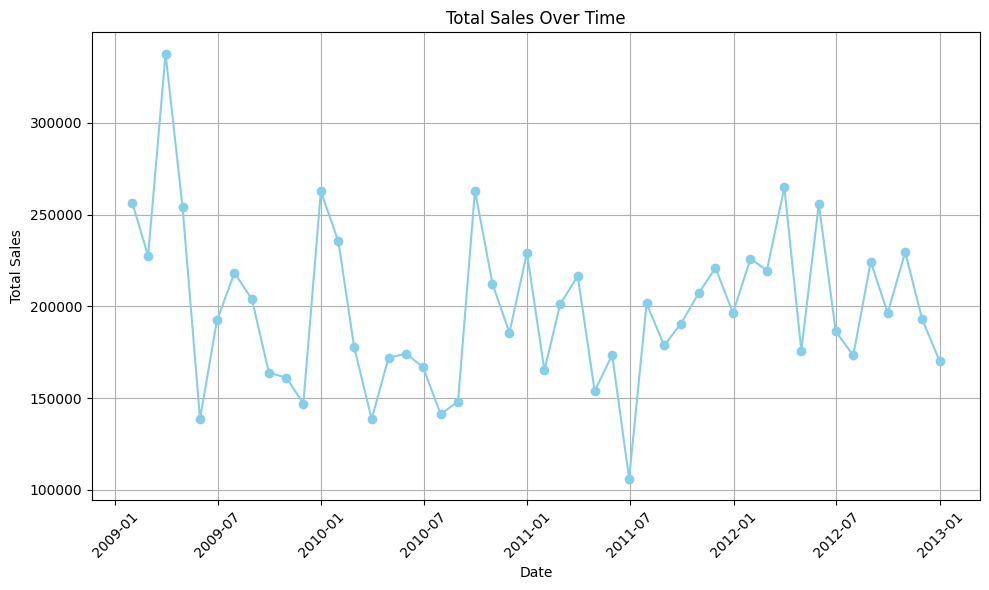

In [70]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group the data by month and calculate the total sales for each month
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

# Plotting total sales over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o', color='skyblue', linestyle='-')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Proft Margin Over Time

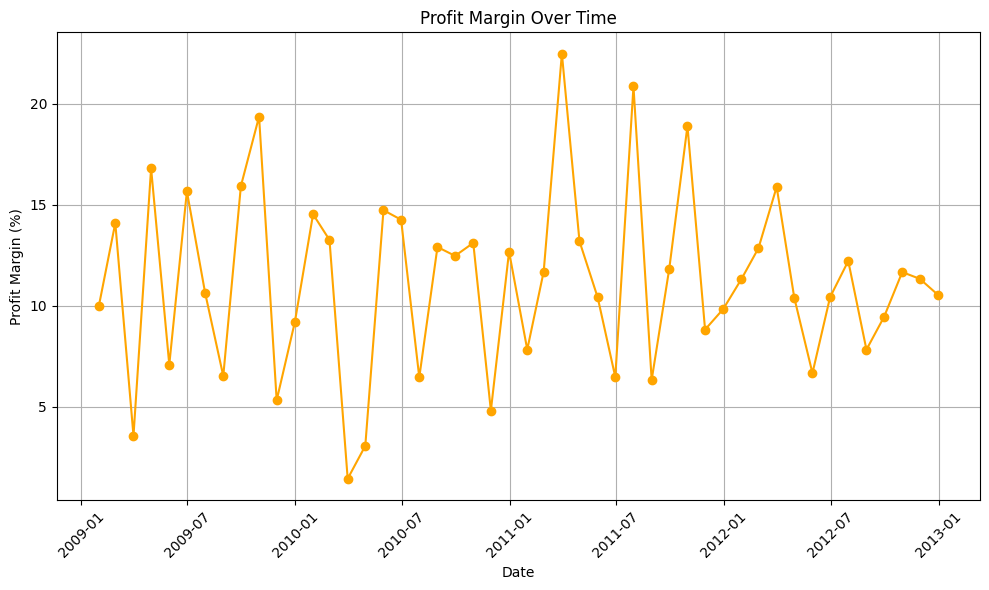

In [71]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group the data by month and calculate the total sales and profit for each month
monthly_sales_profit = df.resample('M', on='Order Date').agg({'Sales': 'sum', 'profit': 'sum'})

# Calculate profit margin (profit divided by sales) and multiply by 100 to get percentage
monthly_sales_profit['Profit Margin'] = (monthly_sales_profit['profit'] / monthly_sales_profit['Sales']) * 100

# Plotting profit margin over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_profit.index, monthly_sales_profit['Profit Margin'], marker='o', color='orange', linestyle='-')
plt.title('Profit Margin Over Time')
plt.xlabel('Date')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()